In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('Gender_Classification_Data.csv')

In [3]:
df.head()

,gender,height,weight,age
0,female,166.835558,64.238722,38
1,female,166.321934,67.165489,65
2,male,193.424782,89.342636,67
3,female,167.027904,67.637666,55
4,male,191.822253,93.985117,29


In [4]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(df)


Shape of DataFrame:  (10000, 4)

Columns in DataFrame:  ['gender', 'height', 'weight', 'age']

Data types of columns:
 gender     object
height    float64
weight    float64
age         int64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
 2   weight  10000 non-null  float64
 3   age     10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB

Number of unique values in each column:
gender: 2
height: 10000
weight: 10000
age: 52

Number of null values in each column:
 gender    0
height    0
weight    0
age       0
dtype: int64

Number of duplicate rows:  0

Descriptive statistics of DataFrame:
           count        mean        std         min         25%         50%  \
height  10000.0  177.492357  14.1192

In [5]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})


In [6]:
df.head(10)

,gender,height,weight,age
0,1,166.835558,64.238722,38
1,1,166.321934,67.165489,65
2,0,193.424782,89.342636,67
3,1,167.027904,67.637666,55
4,0,191.822253,93.985117,29
5,1,159.083714,74.113568,40
6,1,167.056849,82.324419,62
7,1,170.168094,70.004273,37
8,1,173.541806,80.515483,45
9,1,168.907159,67.974743,18


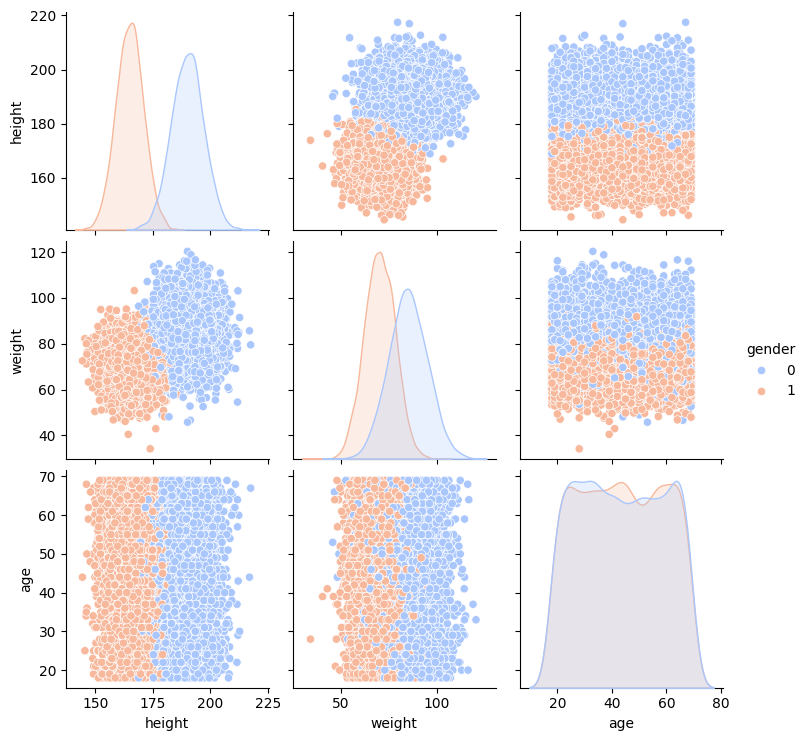

In [7]:
# Visualize features
sns.pairplot(df, hue='gender', palette='coolwarm')
plt.show()

/tmp/ipykernel_2593/974489108.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm', ax=axs[0])


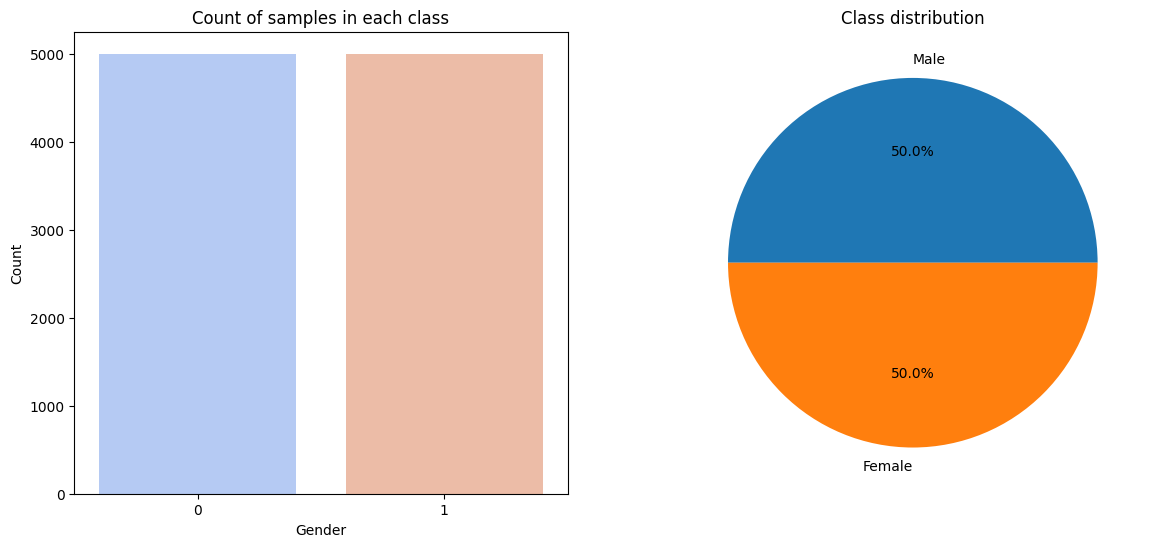

In [8]:
# Count number of samples in each class using bar chart and pie chart
class_counts = df['gender'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Bar chart
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm', ax=axs[0])
axs[0].set_title('Count of samples in each class')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

# Pie chart
axs[1].pie(class_counts, labels=['Male', 'Female'], colors=['#1f77b4', '#ff7f0e'], autopct='%1.1f%%')
axs[1].set_title('Class distribution')

plt.show()

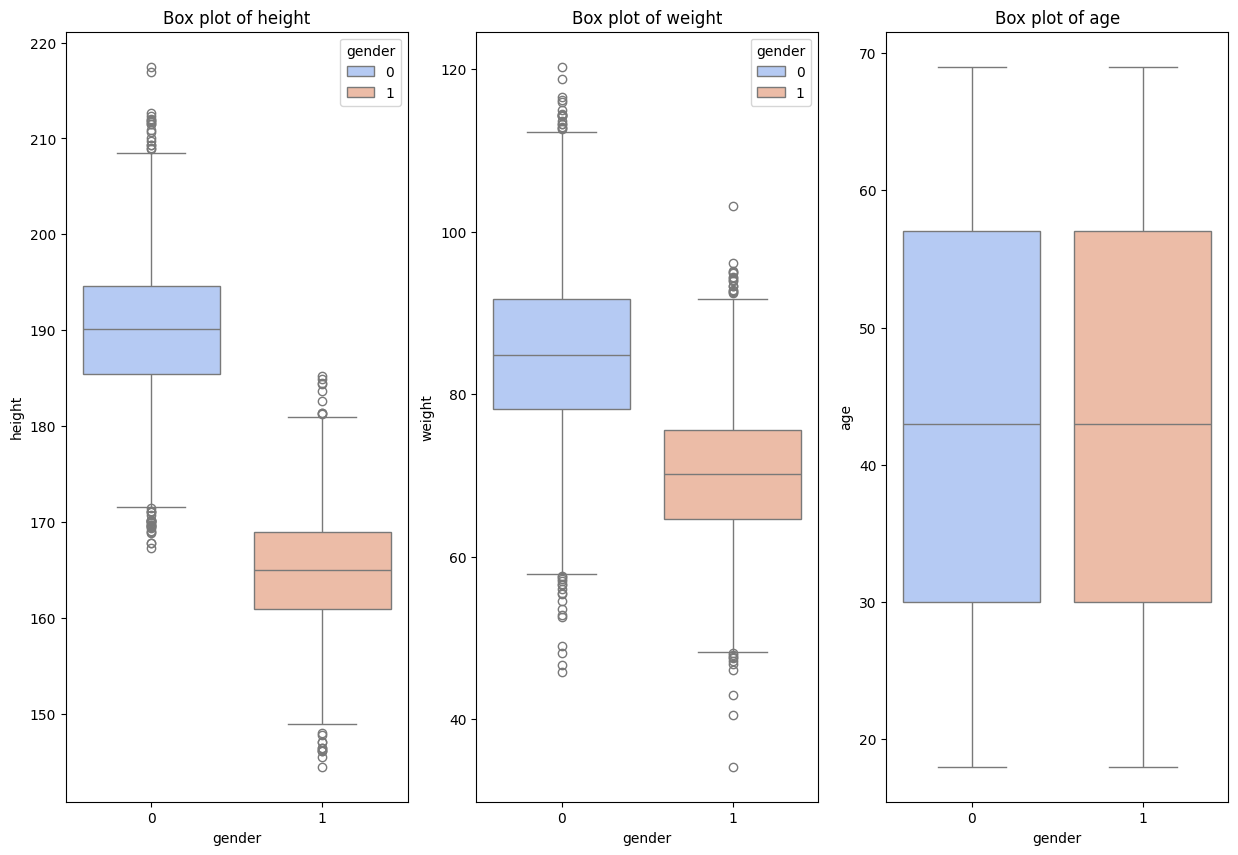

In [9]:
#Box plot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['height', 'weight', 'age'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='gender', y=feature, data=df, hue='gender', palette='coolwarm')
    plt.title(f'Box plot of {feature}')
plt.legend([],[], frameon=False)
plt.show()

In [10]:
#remove outliers from dataset
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.height >= Q1 - 1.5*IQR) & (df.height <= Q3 + 1.5*IQR)] # drop rows that include outliers 


Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.weight >= Q1 - 1.5*IQR) & (df.weight <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [11]:
df.shape

(9961, 4)

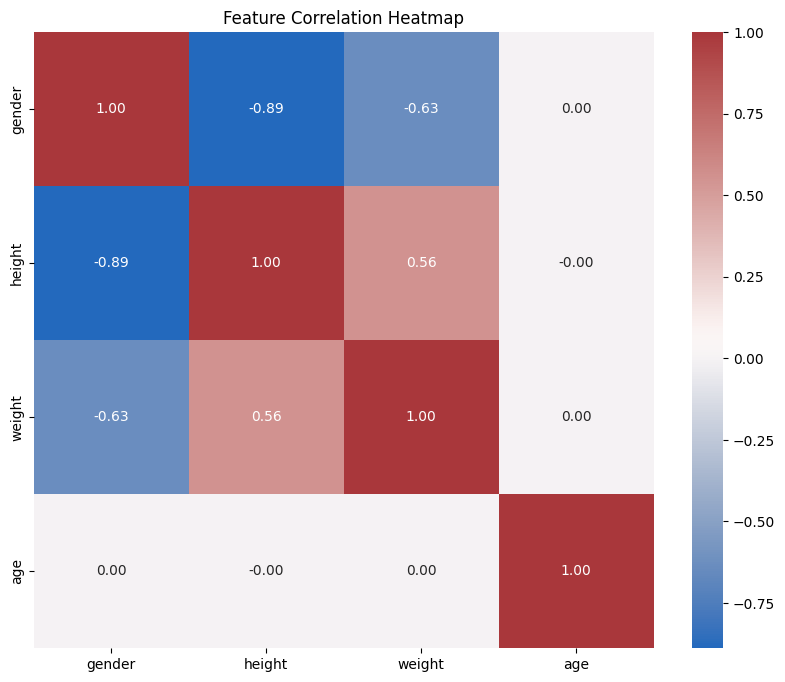

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='vlag', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
# Drop age Feature
df.pop('age')

# Define feature matrix X and target vector y
y=df.pop('gender')
X=df

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.09%


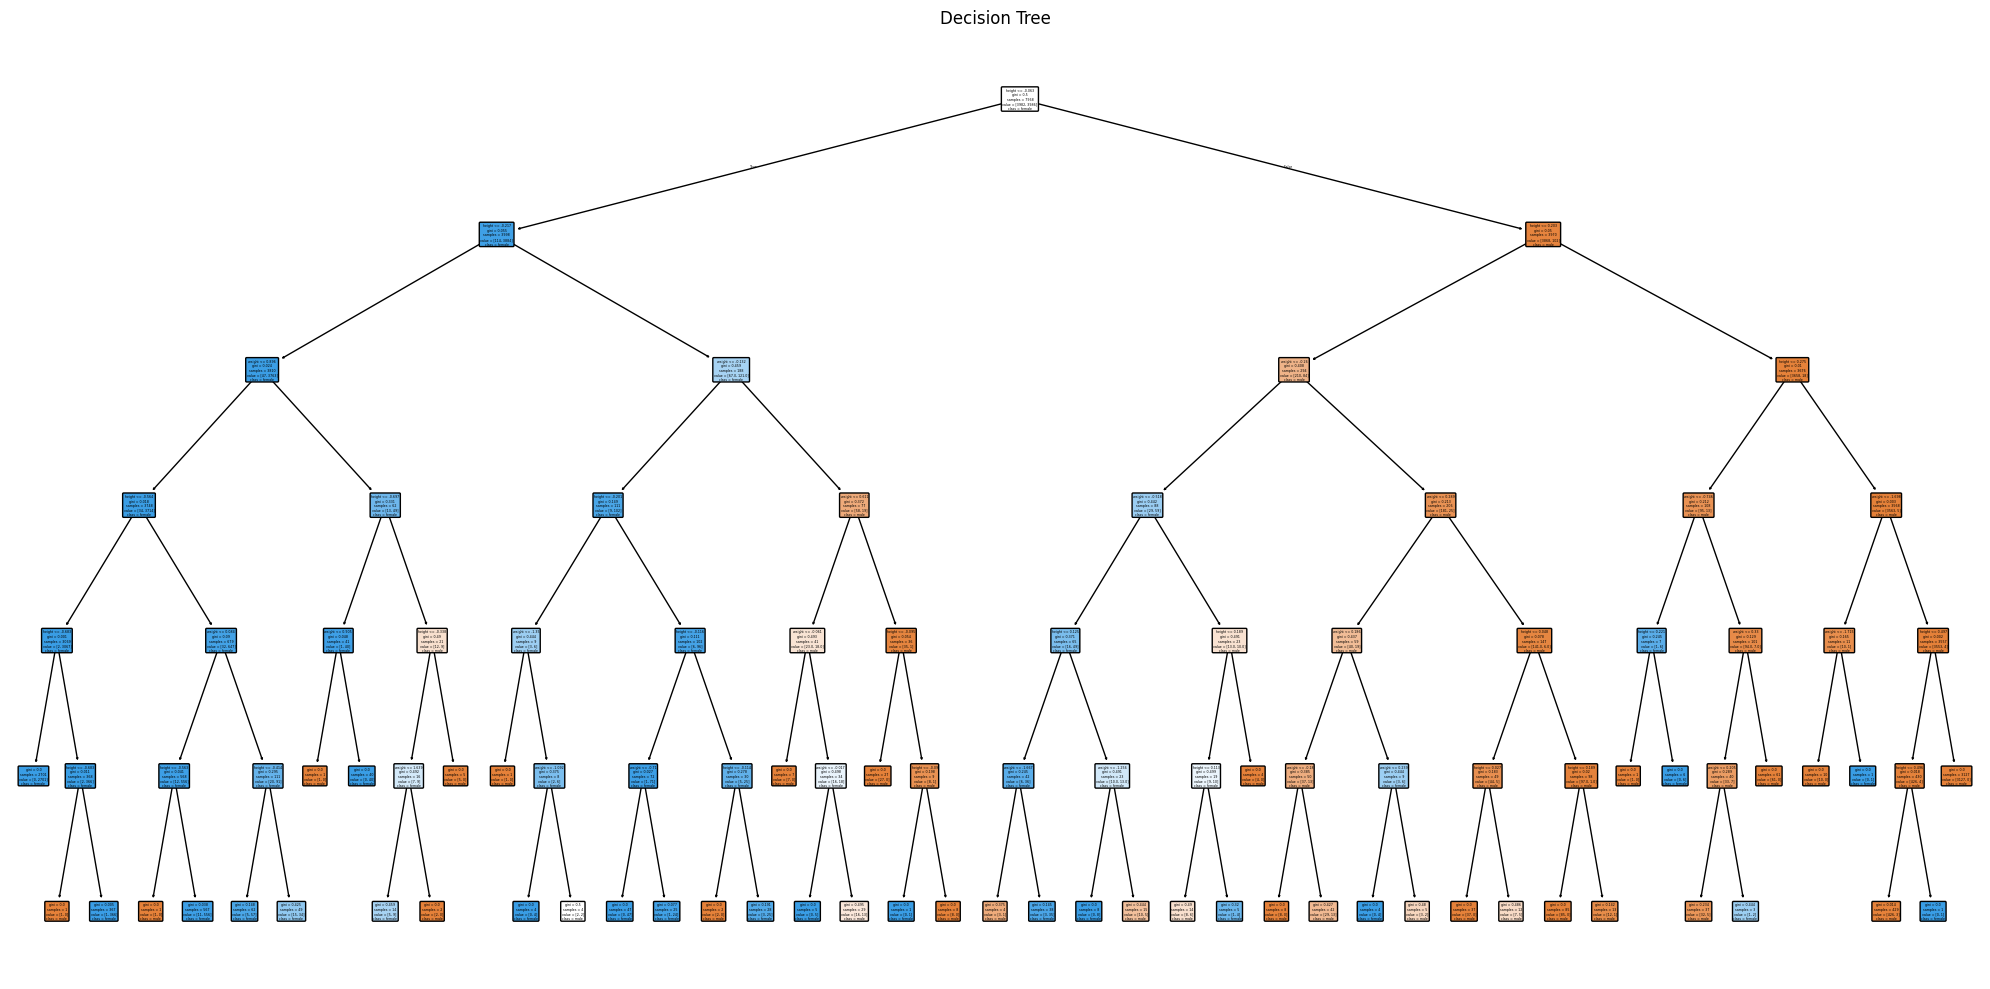

In [17]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['height', 'weight'], class_names=['male', 'female'], rounded=True)
plt.title('Decision Tree')
plt.tight_layout()
plt.show()

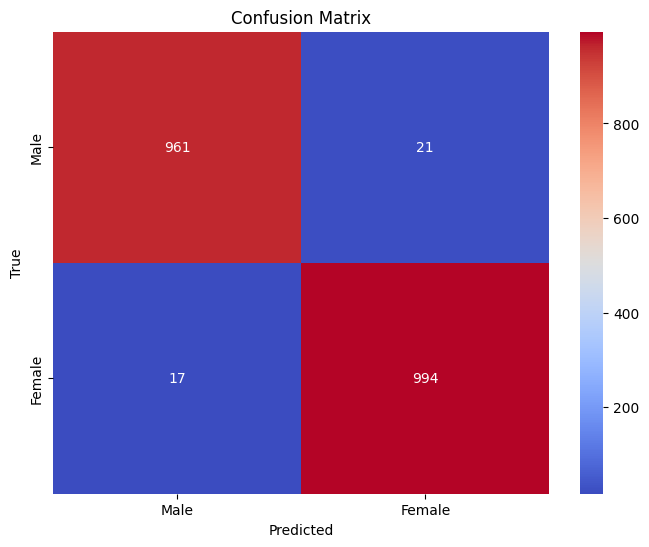

In [18]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       978
           1       0.98      0.98      0.98      1015

    accuracy                           0.98      1993
   macro avg       0.98      0.98      0.98      1993
weighted avg       0.98      0.98      0.98      1993

